In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('R01_students_performance.csv')

In [3]:
print(data.head())

   Study Hours (X)  Exam Scores (Y)
0              1.5               60
1              2.0               65
2              2.5               73
3              3.0               75
4              2.0               62


In [5]:
print(data.isnull().sum())

Study Hours (X)    0
Exam Scores (Y)    0
dtype: int64


In [9]:
X = data[['Study Hours (X)']]
Y = data['Exam Scores (Y)']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train, Y_train)

LinearRegression()

In [13]:
print(f"Intercept: {model.intercept_}")
print(f"Koefisien: {model.coef_[0]}")

Intercept: 40.12894518272425
Koefisien: 12.08056478405316


In [14]:
Y_pred = model.predict(X_test)

In [15]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)


In [16]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 2.5802325581395307
Mean Squared Error (MSE): 16.156393218962812
Root Mean Squared Error (RMSE): 4.0195016132554064
R-squared (R2): 0.7822881927103785


In [17]:
test_comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(test_comparison.head())

    Actual  Predicted
13      88  88.451204
39      84  77.578696
30      91  87.243148
45      78  76.370640
17      69  67.914244


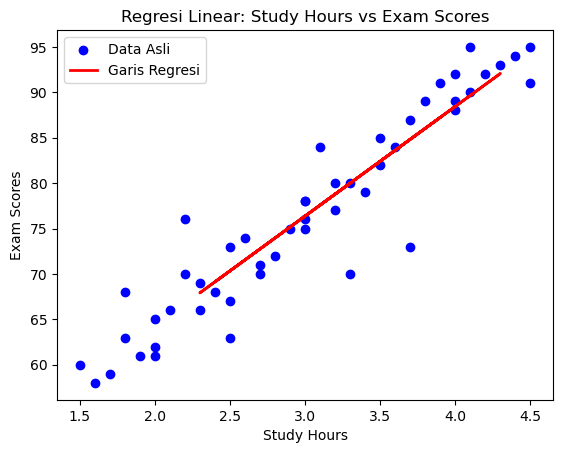

In [18]:
plt.scatter(X, Y, color='blue', label='Data Asli')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Garis Regresi')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.title('Regresi Linear: Study Hours vs Exam Scores')
plt.legend()
plt.show()

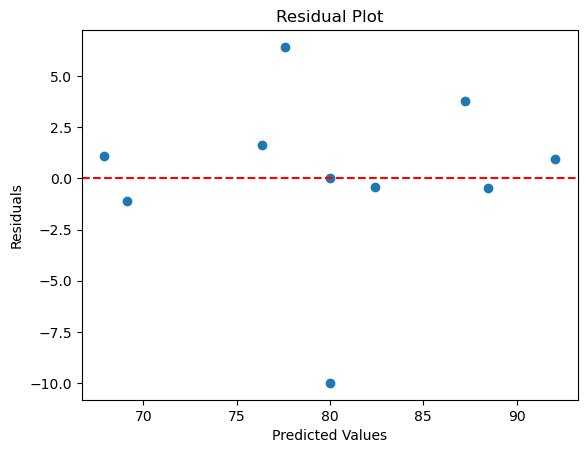

In [19]:
residuals = Y_test - Y_pred
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()